# SPM tutorial

-2019.04.01 notes

This notebook illustrates how battery_cell environment works.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import energym

env = gym.make('spm_environment-v0')


Test single partilce model (SPM)

In [9]:
# Environment settings
env.reset()

print("Action space is discrete?: ", env.discrete)

print("Initial SOC: ",env.SOCn)
print("Target SOC: ",env.SOC_desired)

print("Maximum current: ", env.currents[0])
print("Minimum current: ", env.currents[19])

Action space is discrete?:  True
Initial SOC:  0.2566303117153117
Target SOC:  0.8
Maximum current:  -50.0
Minimum current:  0.0


Text(0.5,0,'Time [sec]')

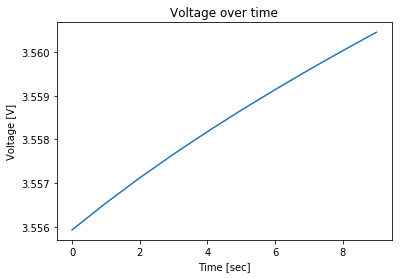

In [11]:

# Simulation
env.reset()
SOCn_list = [env.SOCn]
V_list = [env.V]
c_ss_n_list = [env.css_n]

max_chg_current_idx = 0 # -50A for charging
for i in range(10):
    csn, reward, done, info = env.step(max_chg_current_idx)
    c_ss_n_list.append(info['css_n'])
    V_list.append(info['V'])
    SOCn_list.append(info['SOCn'])
    
plt.figure()
plt.plot(V_list[1:])
plt.title('Voltage over time')
plt.ylabel('Voltage [V]')
plt.xlabel('Time [sec]')